Kotlyarov Nickolay, 308 group

In [150]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from statsmodels.tsa import stattools

# Домашнее задание

Рассмотрим граф  G=(V,E) , вершинам которого случайным образом приписаны значения 0 и 1 так, что смежные вершины не могут одновременно иметь значение 1. Пример расстановки значений по вершинам графа показан на картинке ниже (черные вершины имеют значение 1, белые - 0):

![](graph.jpg)

Как оценить, сколько в среднем закрашенных вершин будет иметь такой граф?

Сформулируем задачу в математических терминах.

Пусть $\xi \in \{0,1\}^{V}$ обозначает конфигурацию графа (расстановку 0 и 1 по вершинам). Назовем конфигурацию допустимой, если вершины, соединенные ребрами, не имеют одновременно значения 1. Пусть $Z_G$ - общее количество допустимых конфигураций. Зададим  распределение на множестве всех конфигураций:
$$\begin{equation*}
\mu(\xi) = 
 \begin{cases}
   \frac{1}{Z_G}, &\text{$\xi$ - допустимая конфигурация}\\
   0, &\text{иначе.}
 \end{cases}
\end{equation*}$$
Обозначим $n(\xi)$ - число закрашенных вершин в конфигурации $\xi$. Тогда
$$
{\rm E} n(\xi) = \sum\limits_{x \in \{0,1\}^V} n(x) \mu(x) = \frac{1}{Z_G} \sum\limits_{x \in \{0,1\}^V} n(x) {\rm I}_{\{x - \text{допустимая} \}}
$$

Явно перебирать все $x \in \{0,1\}^{V}$ не представляется возможным. Мы могли бы попробовать оценить ${\rm E} n(\xi)$, используя закон больших чилел:
$$
{\rm E} n(\xi) \approx \frac{1}{N} \sum\limits_{i=1}^{N} n(\xi), \text{где $\xi \sim \mu$}
$$
Но есть проблема: как смоделировать случайную величину из распределения $\mu$?

В этом нам поможет метод MCMC.

## Задание
1. Оценить En(ξ) с помощью МСМС для графа 8х8
2. Обосновать численно и графически стационарность
3. Построить график распределеиня n(ξ)
4. Изобразить раскраску для одного из случайных графов, взятых из стационарного распределения.
5. Дополнительная: построить график зависимости En(ξ) от N - размера графа (NxN). Что можно сказать о скорости роста En(ξ) как функции от N?

Task 1: Оценить En(ξ) с помощью МСМС для графа 8х8

In [151]:
Arr = np.zeros((8, 8), dtype = bool)

def NEXT_STEP(x):
    y = x.copy()
    neighbor = []
    Axes1 = np.random.randint(size)
    Axes2 = np.random.randint(size)
    
    if (Axes1 == 0  and Axes2 == 0):
        neighbor += (x[Axes1, Axes2+1], x[Axes1+1, Axes2])
    elif (Axes1 == 7  and Axes2 == 0):
        neighbor += (x[Axes1-1, Axes2], x[Axes1, Axes2+1])
    elif (Axes1 == 0  and Axes2 == 7):
        neighbor += (x[Axes1, Axes2-1], x[Axes1+1, Axes2])
    elif (Axes1 == 7  and Axes2 == 7):
        neighbor += (x[Axes1, Axes2-1], x[Axes1-1, Axes2])
    elif (Axes1 == 0 and 0 < Axes2 < 7):
        neighbor += (x[Axes1+1, Axes2], x[Axes1, Axes2-1], x[Axes1, Axes2+1])
    elif (Axes1 == 7 and 0 < Axes2 < 7):
        neighbor += (x[Axes1-1, Axes2], x[Axes1, Axes2-1], x[Axes1, Axes2+1])
    elif (Axes2 == 0 and 0 < Axes1 < 7):
        neighbor += (x[Axes2+1, Axes1], x[Axes2, Axes1-1], x[Axes2, Axes1+1])
    elif (Axes2 == 7 and 0 < Axes1 < 7):
        neighbor += (x[Axes2-1, Axes1], x[Axes2, Axes1-1], x[Axes2, Axes1+1])
    else:
        neighbor += (x[Axes1-1, Axes2], x[Axes1, Axes2-1], x[Axes1, Axes2+1], x[Axes1+1, Axes2])
    step = 0
    for j in neighbor:
        step += j
    if (step > 0):
        y[Axes1, Axes2] = False
    else:
        y[Axes1, Axes2] = bool(np.random.randint(2))
    return y

In [152]:
def Mark_chain(x, niter = 400000, nburn = 200):
    SUMM = []
    curr = x
    Res_ = []
    for i in range(niter):
        Res_.append(curr)
        SUMM.append(np.sum(np.array(curr)))
        curr = step(curr)
    
    return Res_[nburn:], np.array(summ[nburn:])

result, S = Mark_chain(Arr)
print("En(ξ) = ", S.mean())

En(ξ) =  15.357038152610441


Task 2: Обосновать численно и графически стационарность

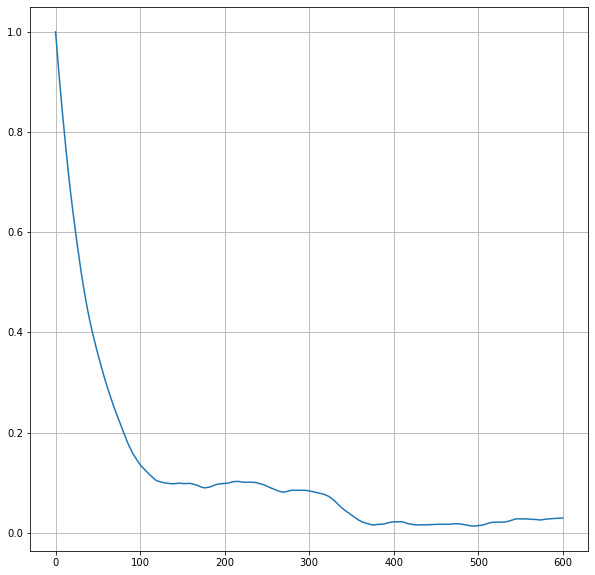

Min corr = 0.013234099075083763
STEP = 494


In [153]:
autocorr = stattools.acf(summ, fft = False, nlags = 600)
MIN = np.argmin(abs(autocorr))
plt.figure(figsize = (10, 10))
plt.plot(autocorr)
plt.grid(True)
plt.show()
print("Min corr =", autocorr[MIN])
print("STEP =", MIN)

Будем прореживать выборку с шагом 494, так как автокорреляция будет принимать минимум

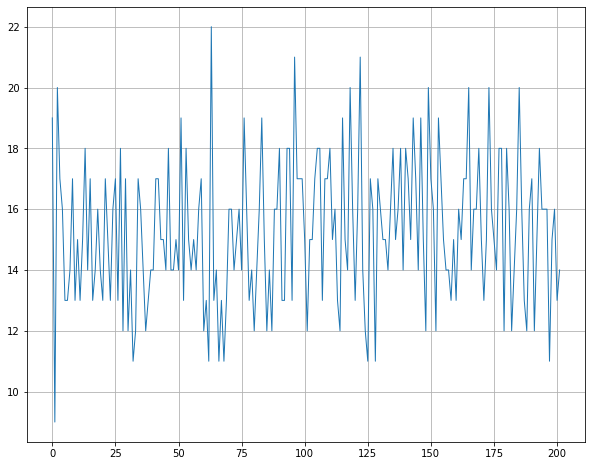

In [154]:
plt.figure(figsize = (10, 8))
S_1 = S[::MIN]
plt.plot(S_1, lw = 1)
grid1 = plt.grid(True)
plt.show()

Гипотезу стацинарности отвергать не стоит

Проверка на тест Стьюдента:

In [155]:
def g_test(x, start=0.1, end=0.5):
    return stats.ttest_ind(x[:int(len(x) * start)], x[-int(len(x) * end):], equal_var=False)

g_test(S_1)

Ttest_indResult(statistic=-0.9329694831907869, pvalue=0.3595909986585393)

Тест Стьюдента подтвердил гипотезу стационарности

Task 3: Построить график распределеиня $n(\xi)$

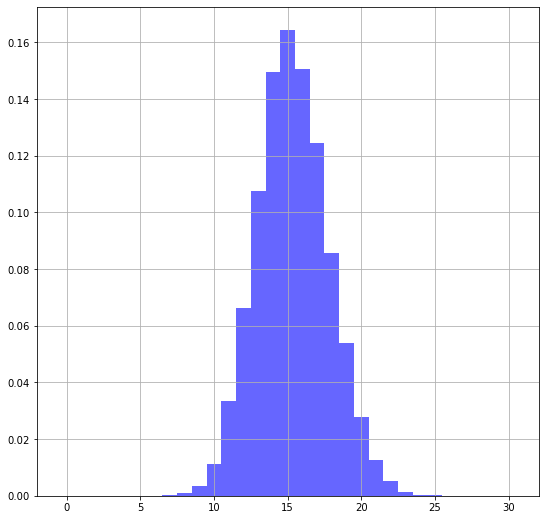

In [156]:
plt.figure(figsize = (9, 9))
plt.hist(S, bins = np.arange(32) - 0.5, density=True, color = 'blue', alpha = 0.6, label = 'graph Distribution of the number of black vertices')
plt.grid(True)
plt.show()

Task 4: Изобразить раскраску для одного из случайных графов, взятых из стационарного распределения.

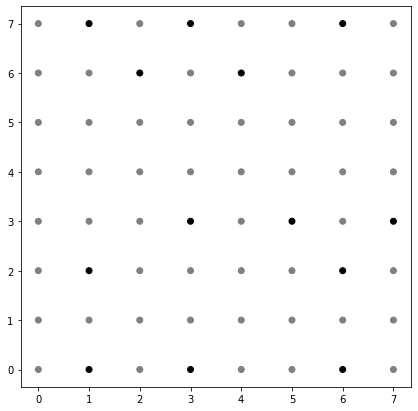

In [157]:
def coloring(Array):
    colors = np.empty(Array.shape, dtype='U5')
    colors[:] = 'grey'
    colors[Array] = 'black'
    x, y = np.indices((Array.shape))
    plt.figure(figsize = (7, 7))
    plt.scatter(x, y, c=colors.ravel())
    plt.show()

coloring(result[-1])